In [3]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import fftpack
from matplotlib.colors import LogNorm

/home/mauro/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(900, 800, 3)


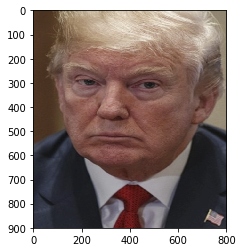

In [4]:
im = cv2.imread('./imgs/Trump.png')
trump = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(trump.shape)
plt.imshow(trump)
plt.show()

(900, 800, 3)


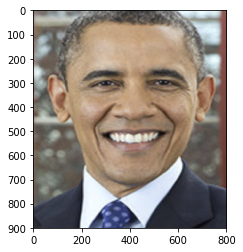

In [5]:
im = cv2.imread('./imgs/Obama.png')
obama = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(obama.shape)
plt.imshow(obama)
plt.show()

/home/mauro/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5,1,'B')

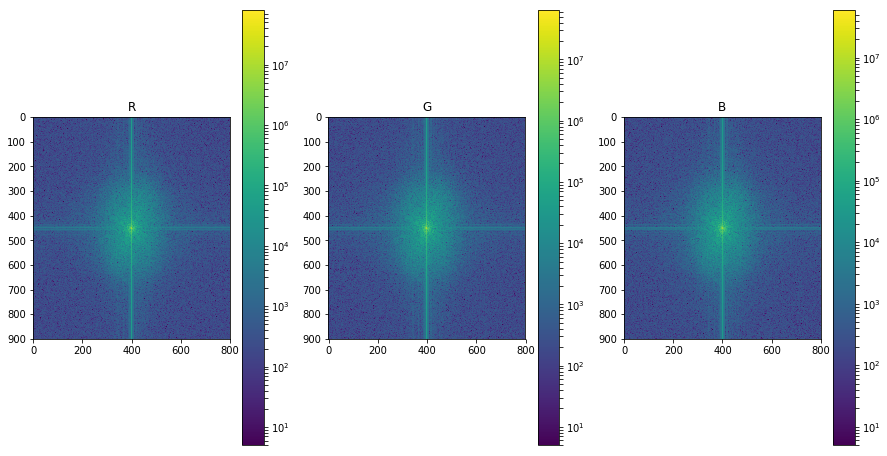

In [6]:

im_fft_r = fftpack.fft2(trump[:,:,0])
im_fft_g = fftpack.fft2(trump[:,:,1])
im_fft_b = fftpack.fft2(trump[:,:,2])

im_fft_r = np.fft.fftshift(im_fft_r)
im_fft_g = np.fft.fftshift(im_fft_g)
im_fft_b = np.fft.fftshift(im_fft_b)


plt.figure(figsize = (15,8))
plt.subplot(131)
plot_spectrum(im_fft_r)
plt.title('R')
plt.subplot(132)
plot_spectrum(im_fft_g)
plt.title('G')
plt.subplot(133)
plot_spectrum(im_fft_b)
plt.title('B')

In [7]:
def circFilter(x,y):
    r = 25
    if((x**2+y**2)**0.5<r):
        return True
    return False

In [8]:
lenx,leny = im_fft_g.shape
for i in range(lenx):
    for j in range(leny):
        if( circFilter(i-450,j-400)):
            im_fft_g[i,j]=0+0j

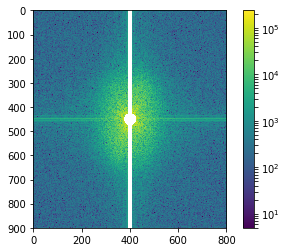

In [9]:
im_fft_g[:,390:410] = 0 
plot_spectrum(im_fft_g)

/home/mauro/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5,1,'Reconstructed Image')

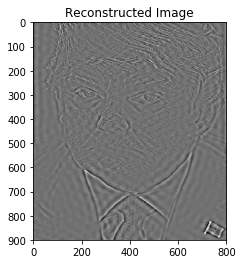

In [10]:
# im = fftpack.ifft2(im_fft_g)


im_fft_g = np.fft.fftshift(im_fft_g)
im_new = fftpack.ifft2(im_fft_g).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

In [41]:
def fourier(im):
#     im= ima.copy()
    print(im.shape)
    res = np.array(im.shape)
    print(res.shape)
    for i in range(3):
        res[:,:,i] = fftpack.fft2(im[:,:,i])
        print(res[:,:,i])
        res[:,:,i] = np.fft.fftshift(im[:,:,i])
    return im
def ifourier(im):
    for i in range(3):
        im[:,:,i] = np.fft.fftshift(im[:,:,i])
        im[:,:,i] = fftpack.ifft2(im[:,:,i]).real
    return im
def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

In [42]:
def lowFilter(im):
    
    fimag = fourier(im)
    
    

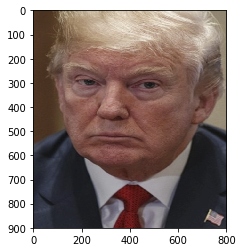

In [43]:
plt.imshow(trump)

In [44]:
ftrump = fourier(trump)
plot_spectrum(ftrump[:,:,0])


(900, 800, 3)
(3,)


/home/mauro/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


IndexError: too many indices for array

In [39]:
ftrump

array([[[212, 249, 144],
        [103,   3, 136],
        [ 75,  94, 201],
        ...,
        [252,  69,  23],
        [ 75,  94, 201],
        [103,   3, 136]],

       [[ 23, 238, 189],
        [121, 100,  97],
        [ 11, 245,  45],
        ...,
        [133,  81, 141],
        [199,  72,  51],
        [ 14,  99,  88]],

       [[155, 197, 129],
        [ 24,  19, 110],
        [109, 126, 104],
        ...,
        [174,  40,   6],
        [187, 176,  58],
        [104, 166,  60]],

       ...,

       [[180, 190,  41],
        [200, 219, 193],
        [ 76, 141, 155],
        ...,
        [ 11, 153,  11],
        [ 72,   7, 198],
        [250, 212, 233]],

       [[155, 197, 129],
        [104, 166,  60],
        [187, 176,  58],
        ...,
        [107,   0, 157],
        [109, 126, 104],
        [ 24,  19, 110]],

       [[ 23, 238, 189],
        [ 14,  99,  88],
        [199,  72,  51],
        ...,
        [100, 170, 167],
        [ 11, 245,  45],
        [121, 100,  97]]